In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train_df=pd.read_csv('Titanic_train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_df.shape

(891, 12)

In [4]:
train_df.size

10692

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# find mean to replace missing values in Age column
mean=train_df['Age'].mean()
mean

29.69911764705882

In [23]:
# fill null value with mean of Age
train_df.fillna({'Age':mean},inplace=True)

In [25]:
# remove cols not useful for training and cabin(many null values)
train_df.drop(columns=['Cabin','Name','PassengerId','Ticket','Fare'],inplace=True)

In [27]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


In [29]:
train_df.dropna(inplace=True)

In [31]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


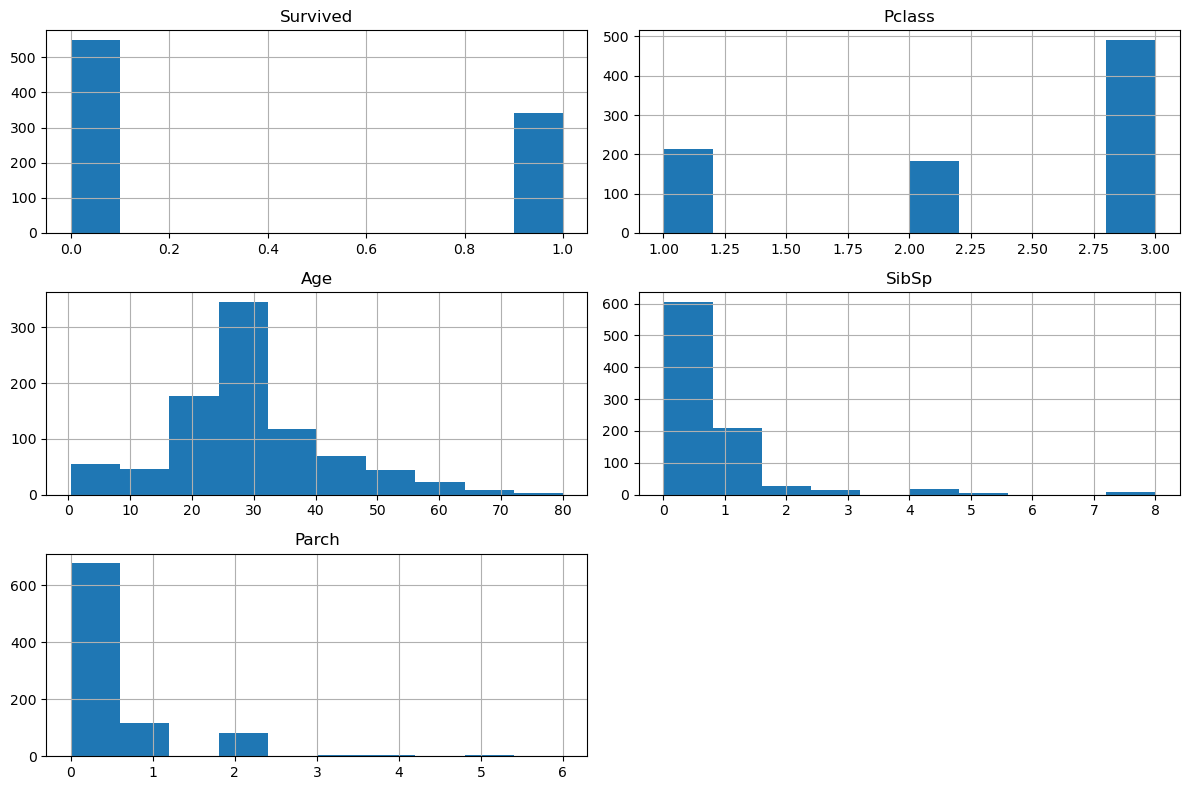

In [33]:
import matplotlib.pyplot as plt
train_df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

<Axes: xlabel='Survived'>

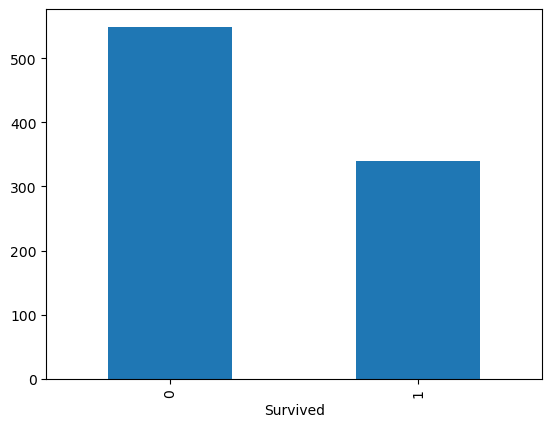

In [34]:
train_df['Survived'].value_counts().plot(kind='bar')


In [37]:
cat_col=[i for i in train_df.columns if train_df[i].dtype=='O']
cat_col

['Sex', 'Embarked']

In [39]:
num_col=[i for i in train_df.columns if train_df[i].dtype!='O']
num_col

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch']

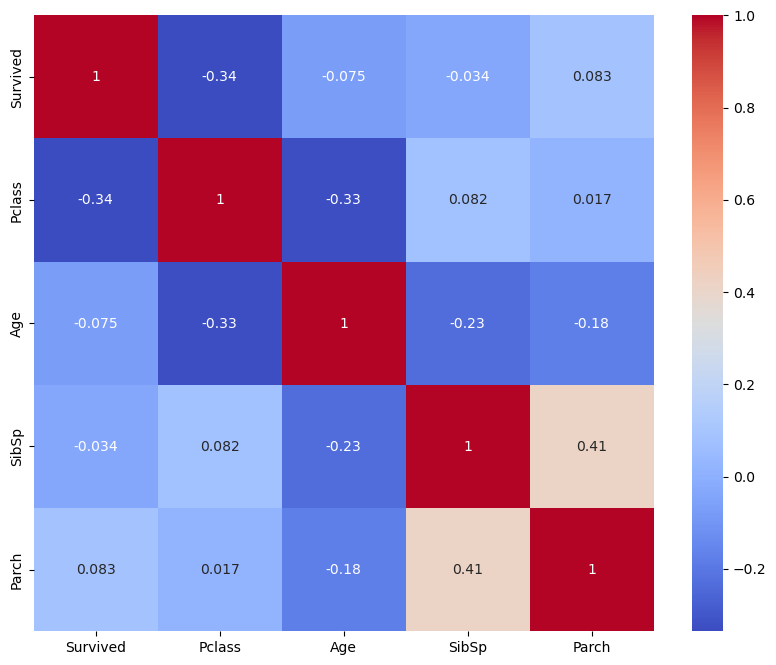

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(train_df[num_col].corr(), annot=True, cmap='coolwarm')
plt.show()


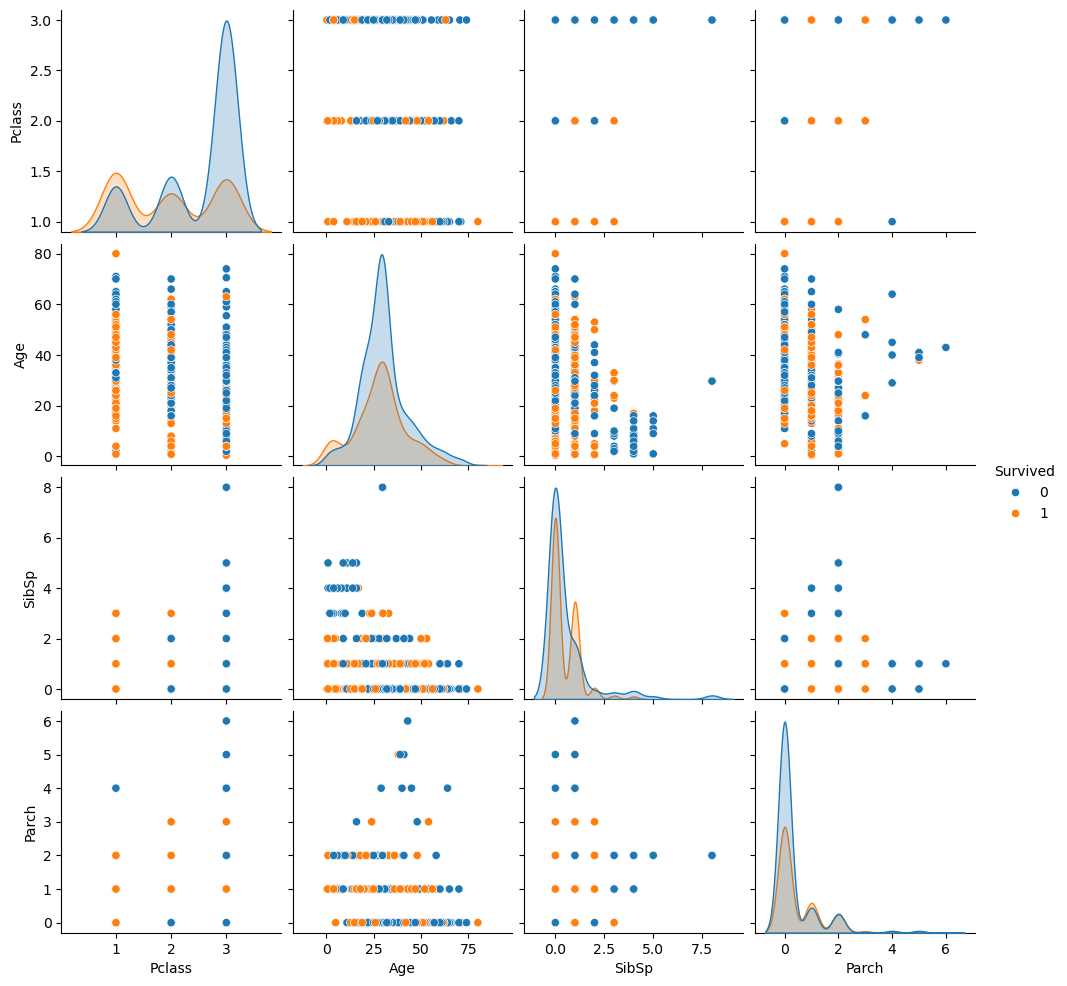

In [43]:
sns.pairplot(train_df, hue='Survived')

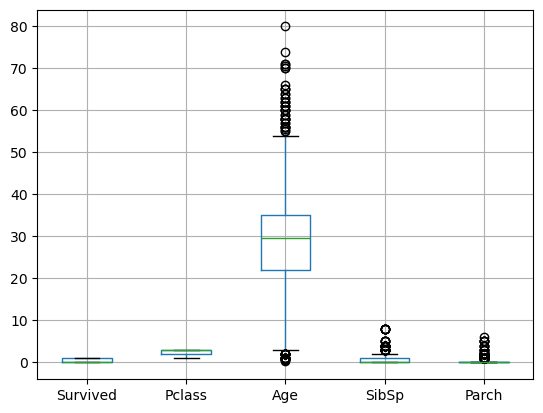

In [44]:
train_df.boxplot()
plt.show()

In [45]:
Q1=train_df['Age'].quantile(0.25)
Q3=train_df['Age'].quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

22.0 35.0 13.0


In [46]:
lower_extreme=Q1-1.5*IQR
lower_extreme

2.5

In [47]:
upper_extreme=Q1+1.5*IQR
upper_extreme

41.5

In [48]:
data_Age_outliers=train_df[(train_df['Age']<lower_extreme) | (train_df['Age']>upper_extreme)]
data_Age_outliers

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
6,0,1,male,54.0,0,0,S
7,0,3,male,2.0,3,1,S
11,1,1,female,58.0,0,0,S
15,1,2,female,55.0,0,0,S
16,0,3,male,2.0,4,1,Q
...,...,...,...,...,...,...,...
862,1,1,female,48.0,0,0,S
865,1,2,female,42.0,0,0,S
871,1,1,female,47.0,1,1,S
873,0,3,male,47.0,0,0,S


In [49]:
# EDA for test_df

In [50]:
test_df=pd.read_csv('Titanic_test.csv')

In [51]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [61]:
test_df.shape

(418, 11)

In [63]:
test_df.size

4598

In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [67]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [69]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [71]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [73]:
mean=test_df['Age'].mean()
mean

30.272590361445783

In [75]:
test_df.fillna({'Age':mean},inplace=True)

In [77]:
test_df.drop(columns=['Cabin','Name','PassengerId','Ticket','Fare'],inplace=True)

In [79]:
test_df.dropna(inplace=True)

In [81]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.50000,0,0,Q
1,3,female,47.00000,1,0,S
2,2,male,62.00000,0,0,Q
3,3,male,27.00000,0,0,S
4,3,female,22.00000,1,1,S
...,...,...,...,...,...,...
413,3,male,30.27259,0,0,S
414,1,female,39.00000,0,0,C
415,3,male,38.50000,0,0,S
416,3,male,30.27259,0,0,S


In [83]:
# encoding

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
one_hot=OneHotEncoder()

In [89]:
df1=pd.DataFrame(one_hot.fit_transform(train_df[['Sex','Embarked']]).toarray())

In [91]:
df1

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,1.0
885,1.0,0.0,0.0,0.0,1.0
886,1.0,0.0,0.0,0.0,1.0
887,0.0,1.0,1.0,0.0,0.0


In [93]:
train_df=train_df.join(df1)

In [95]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,0,1,2,3,4
0,0,3,male,22.000000,1,0,S,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.000000,1,0,C,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.000000,0,0,S,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35.000000,1,0,S,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35.000000,0,0,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S,1.0,0.0,0.0,0.0,1.0
887,1,1,female,19.000000,0,0,S,0.0,1.0,1.0,0.0,0.0
888,0,3,female,29.699118,1,2,S,0.0,1.0,0.0,1.0,0.0
889,1,1,male,26.000000,0,0,C,NaN,NaN,NaN,NaN,NaN


In [97]:
train_df.dropna(inplace=True)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,0,1,2,3,4
0,0,3,male,22.000000,1,0,S,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.000000,1,0,C,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.000000,0,0,S,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35.000000,1,0,S,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35.000000,0,0,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.000000,0,0,S,0.0,1.0,0.0,0.0,1.0
885,0,3,female,39.000000,0,5,Q,1.0,0.0,0.0,0.0,1.0
886,0,2,male,27.000000,0,0,S,1.0,0.0,0.0,0.0,1.0
887,1,1,female,19.000000,0,0,S,0.0,1.0,1.0,0.0,0.0


In [99]:
train_df.drop((['Sex','Embarked']),axis=1,inplace=True)

In [101]:
train_df=train_df.rename(columns={0:'Female',1:'Male',2:'Embarked_C',3:'Embarked_Q',4:'Embarked_S'})

In [103]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.000000,1,0,1.0,0.0,1.0,0.0,0.0
2,1,3,26.000000,0,0,1.0,0.0,0.0,0.0,1.0
3,1,1,35.000000,1,0,1.0,0.0,0.0,0.0,1.0
4,0,3,35.000000,0,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
884,0,3,25.000000,0,0,0.0,1.0,0.0,0.0,1.0
885,0,3,39.000000,0,5,1.0,0.0,0.0,0.0,1.0
886,0,2,27.000000,0,0,1.0,0.0,0.0,0.0,1.0
887,1,1,19.000000,0,0,0.0,1.0,1.0,0.0,0.0


In [105]:
from sklearn.linear_model import LogisticRegression

In [107]:
log_model=LogisticRegression

In [109]:
target=train_df[['Survived']]
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
884,0
885,0
886,0
887,1


In [111]:
features=train_df.drop(columns='Survived')

In [113]:
features

,Pclass,Age,SibSp,Parch,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,0.0,1.0,0.0,0.0,1.0
1,1,38.000000,1,0,1.0,0.0,1.0,0.0,0.0
2,3,26.000000,0,0,1.0,0.0,0.0,0.0,1.0
3,1,35.000000,1,0,1.0,0.0,0.0,0.0,1.0
4,3,35.000000,0,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
884,3,25.000000,0,0,0.0,1.0,0.0,0.0,1.0
885,3,39.000000,0,5,1.0,0.0,0.0,0.0,1.0
886,2,27.000000,0,0,1.0,0.0,0.0,0.0,1.0
887,1,19.000000,0,0,0.0,1.0,1.0,0.0,0.0


In [115]:
from sklearn.model_selection import train_test_split

In [117]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=10)

In [119]:
log_model=LogisticRegression()

In [121]:
log_model.fit(x_train,y_train)

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
y_pred=log_model.predict(x_test)

In [125]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [127]:
accuracy_score(y_test,y_pred)

0.6756756756756757

In [129]:
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.metrics import roc_auc_score,roc_curve
import seaborn as sns

In [131]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[110,  19],
       [ 53,  40]], dtype=int64)

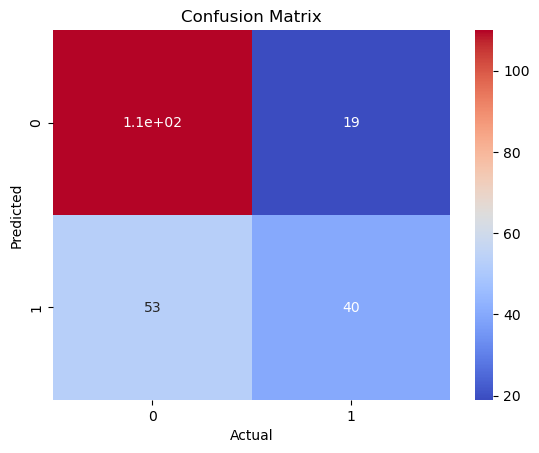

In [133]:
sns.heatmap(confusion_matrix,annot=True,cmap='coolwarm')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [135]:
y_test.value_counts()

Survived
0           129
1            93
Name: count, dtype: int64

In [137]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       129
           1       0.68      0.43      0.53        93

    accuracy                           0.68       222
   macro avg       0.68      0.64      0.64       222
weighted avg       0.68      0.68      0.66       222



In [139]:
log_proba=log_model.predict_proba(x_test)[:,1]
log_proba

array([0.45090022, 0.31141779, 0.53083763, 0.23913968, 0.64636282,
       0.34347438, 0.30643437, 0.20726653, 0.64921722, 0.12570289,
       0.20726653, 0.79553417, 0.15326106, 0.56251201, 0.46372673,
       0.07205158, 0.38272746, 0.25470686, 0.42270766, 0.64636282,
       0.20726653, 0.86191264, 0.72774083, 0.5204704 , 0.23187065,
       0.32513024, 0.57177867, 0.74041244, 0.61468308, 0.53270648,
       0.06434756, 0.44312024, 0.55109784, 0.43231142, 0.40650911,
       0.27293678, 0.22791349, 0.73671179, 0.34092869, 0.20726653,
       0.62234315, 0.42744295, 0.37059311, 0.72828795, 0.70110574,
       0.28126543, 0.21911479, 0.4102479 , 0.38219625, 0.4323334 ,
       0.29211352, 0.20726653, 0.42497153, 0.64921722, 0.62234315,
       0.58182441, 0.34292131, 0.50241545, 0.16766458, 0.24487445,
       0.41912515, 0.24487445, 0.34866088, 0.14824599, 0.18692943,
       0.20726653, 0.39206108, 0.37226045, 0.24120348, 0.38661218,
       0.42744295, 0.26476392, 0.33234092, 0.45090022, 0.27285

In [141]:
auc_score=roc_auc_score(y_test,log_proba)
auc_score

0.7341835458864716

In [143]:
roc_curve(y_test,log_proba)

(array([0.        , 0.        , 0.        , 0.00775194, 0.00775194,
        0.01550388, 0.01550388, 0.02325581, 0.03100775, 0.03100775,
        0.04651163, 0.04651163, 0.05426357, 0.05426357, 0.0620155 ,
        0.0620155 , 0.0620155 , 0.06976744, 0.06976744, 0.07751938,
        0.07751938, 0.08527132, 0.08527132, 0.10077519, 0.10077519,
        0.12403101, 0.12403101, 0.13178295, 0.13178295, 0.14728682,
        0.14728682, 0.1627907 , 0.1627907 , 0.17054264, 0.17829457,
        0.18604651, 0.18604651, 0.20155039, 0.20155039, 0.20930233,
        0.20930233, 0.21705426, 0.21705426, 0.2248062 , 0.2248062 ,
        0.24031008, 0.24031008, 0.25581395, 0.25581395, 0.27906977,
        0.28682171, 0.28682171, 0.29457364, 0.29457364, 0.34883721,
        0.34883721, 0.35658915, 0.35658915, 0.36434109, 0.36434109,
        0.37984496, 0.37984496, 0.39534884, 0.39534884, 0.41085271,
        0.41085271, 0.42635659, 0.44186047, 0.4496124 , 0.4496124 ,
        0.46511628, 0.48062016, 0.48062016, 0.50

In [145]:
fpr,tpr,thr=roc_curve(y_test,log_proba)

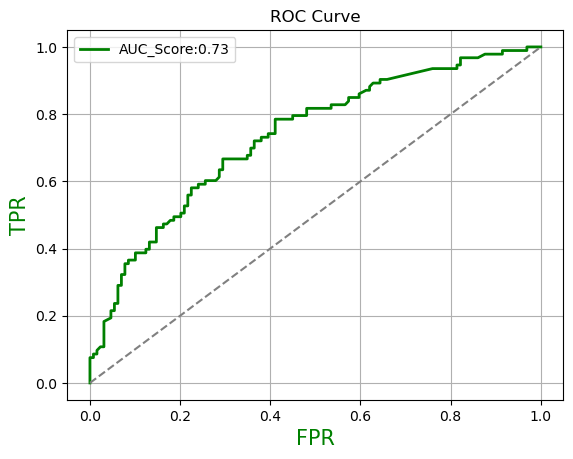

In [147]:
plt.plot(fpr,tpr,lw=2,color='green',label=f'AUC_Score:{auc_score:.2f}')
plt.legend(loc='best')
plt.plot([0,1],[0,1],linestyle='--',color='grey')
plt.title('ROC Curve')
plt.xlabel('FPR',color='green',size=15)
plt.ylabel('TPR',color='green',size=15)
plt.grid()
plt.show()

In [149]:
y_pred=log_model.predict(features)

In [151]:
accuracy_score(y_pred,target)

0.7068771138669673

In [153]:
file='logmodel_pkl'

In [155]:
import pickle

In [157]:
pickle.dump(log_model,open(file,'wb'))

In [159]:
test_df.to_csv('test_df.csv',index=False)

In [161]:
## Interview questions

##Precision is the ratio of true positives (correctly predicted positive cases) to all predicted positives.
It measures how many of the predicted positive instances are actually positive. A high precision indicates fewer false positives,
which is important when the cost of a false positive is high (e.g., in email spam detection).

##Recall (or sensitivity) is the ratio of true positives to all actual positives. It measures how many of the actual positive instances were correctly identified by the model. High recall is crucial when we want to capture as many positive cases as possible (e.g., in medical diagnosis).



##Cross-Validation is a technique for evaluating how well a model generalizes by dividing data into subsets (or "folds"). In each iteration, one fold is used for testing, while the remaining folds are used for training. This process repeats until each fold has been used for testing once, and the average performance is computed.
Importance in Binary Classification: In binary classification, cross-validation helps prevent overfitting by ensuring the model is evaluated on multiple subsets, representing diverse portions of the data. It gives a more reliable estimate of model performance, especially in situations with imbalanced classes, by helping assess the model’s ability to generalize to unseen data.